# Homework - 3
***
**Name**: Christina Cleveland
***

This assignment is due on Canvas by **5pm on Friday October 19th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

### Problem - 1 [5 points]

Consider a single Boolean random variable $Y$ (the "classification"). Let the prior probability $P(Y= true)$ be $\pi$. Let's try to find $\pi$, given a training set $D = (y_1,\cdots, y_N)$ with $N$ independent samples of $Y$. Furthermore, suppose $p$ of the $N$ samples are positive (i.e, labeled as true) and $n$ of the $N$ samples are negative.

1. Write down an expression for the likelihood of $D$ (that is, the probability of seeing this particular sequence of examples, given a fixed value of $\pi$) in terms of $\pi$, $p$ and $n$.

$$L(D) = \pi^p(1-\pi)^n$$

2. By differentiating the log likelihood $L$, find the value of $\pi$ that maximizes the likelihood

$$\mathscr{l}(D) = p\log\pi + n\log(1-\pi)$$

$$\frac{\delta}{\delta\pi}\mathscr{l}(D) = \frac{p}{\pi} - \frac{n}{1-\pi} = 0$$

$$\frac{1-\pi}{\pi} = \frac{n}{p}$$

$$\frac{1}{\pi} = \frac pp+ \frac{n}{p}$$ 

$$\boxed{\pi = \frac p{p+n} }$$

3. Write down the likelihood for the data including the attributes, using the following additional notation:

    * $\alpha_i$ is $P(X_i = true | Y = true)$
    * $\beta_i$ is $P(X_i = true | Y = false)$
    * $p_i^+$ is the count of samples for which $X_i = true$ and $Y = true$
    * $n_i^+$ is the count of samples for which $X_i = false$ and $Y = true$
    * $p_i^-$ is the count of samples for which $X_i = true$ and $Y = false$
    * $n_i^-$ is the count of samples for which $X_i = false$ and $Y = false$

let k be the number of features in $\mathbf{x}$, N be the total number of data points, assume $y,x \in \{0,1\}$

$$L(D) = \prod_{t=1}^{N} P(y_t, \mathbf{x_t}) = \prod_{t=1}^{N} P(y_t)P(\mathbf{x_t} \mid y_t) $$
$$ L(D)= \big(\prod_{t=1}^{N} P(y_t = true)^{y_t}P(y_t = false)^{1-y_t}\big)\big(\prod_{t=1}^{N} P(\mathbf{x_t} \mid y_t = true)^{y_t}P(\mathbf{x_t} \mid y_t = false)^{1-y_t}\big)$$

$$ P(\mathbf{x} \mid y = true) =  \prod_{i=1}^{k} P(x_i \mid y = true) = \prod_{i=1}^{k} P(x_i = true \mid y = true)^{x_i} (1-P(x_i = true \mid y = true))^{1-x_i}$$


substituting in using the variables defined above:
$$ P(\mathbf{x} \mid y = true) = \prod_{i=1}^{k} \alpha_i^{x_i}(1-\alpha_i)^{1-x_i} $$

doing the same thing for y = false, we get:

$$ P(\mathbf{x} \mid y = false) = \prod_{i=1}^{k} \beta_i^{x_i}(1-\beta_i)^{1-x_i} $$


so, the likelihood is:

$$ L(D)= \big(\prod_{t=1}^{N} P(y_t = true)^{y_t}P(y_t = false)^{1-y_t}\big)\big(\prod_{t=1}^{N} \big(\prod_{i=1}^{k} \alpha_i^{x_i}(1-\alpha_i)^{1-x_i}\big)^{y_t}\big(\prod_{i=1}^{k} \beta_i^{x_i}(1-\beta_i)^{1-x_i}\big)^{1-y_t}\big)$$

Based on the additional variables above:

$$\boxed{ L(D)= \big(\prod_{t=1}^{N} P(y_t = true)^{y_t}P(y_t = false)^{1-y_t}\big)\big(\prod_{i=1}^{k} (\alpha_i^{p_i^+}(1-\alpha_i)^{n_i^+})^{p_i^++n_i^+}(\beta_i^{p_i^-}(1-\beta_i)^{n_i^-})^{p_i^-+n_i^-}\big)}$$


4. By differentiating the log likelihood L, find the values of $\alpha_i$ and $\beta_i$ (in terms of the various counts) that maximize the likelihood

First, find the log-likelihood of the data, $\mathscr{l}(D)$:

$$\mathscr{l}(D) = \bigg(\sum_{t=1}^{N} \log\big(P(y_t = true)^{y_t}(1-P(y_t = true))^{1-y_t}\big)\bigg)+\bigg(\sum_{i=1}^{k} (p_i^++n_i^+)log\big(\alpha_i^{p_i^+}(1-\alpha_i)^{n_i^+}\big)+ (p_i^-+n_i^-)log\big(\beta_i^{p_i^-}(1-\beta_i)^{n_i^-}\big)\bigg)$$

$$\mathscr{l}(D) = \bigg(\sum_{t=1}^{N} \log\big(P(y_t = true)^{y_t}(1-P(y_t = true))^{1-y_t}\big)\bigg)+\bigg(\sum_{i=1}^{k} (p_i^++n_i^+)\big(p_i^+log\alpha_i+n_i^+log(1-\alpha_i)\big)+ (p_i^-+n_i^-)\big(p_i^-log\beta_i+ n_i^-log(1-\beta_i)\big)\bigg)$$

Take the derivative w.r.t. $\alpha_i$:

$$\frac{\delta}{\delta\alpha_i}\mathscr{l}(D)= 0 +\sum_{i=1}^{k} (p_i^++n_i^+)\big(\frac{p_i^+}{\alpha_i}-\frac{n_i^+}{1-\alpha_i}\big) + 0 = 0 $$

So your average or expected value of the statement in the summation is:

$$(p_i^++n_i^+)\big(\frac{p_i^+}{\alpha_i}-\frac{n_i^+}{1-\alpha_i}\big) = 0$$

$$\frac{p_i^+}{\alpha_i}= \frac{n_i^+}{1-\alpha_i}$$

$$\frac{1-\alpha_i}{\alpha_i}= \frac{n_i^+}{p_i^+}$$

$$\boxed{{\alpha_i}  = \frac{p_i^+}{p_i^+ + n_i^+}}$$


Follow the same steps and take the derivative w.r.t $\beta_i$:

$$\frac{\delta}{\delta\beta_i}\mathscr{l}(D)= 0 +\sum_{i=1}^{k} 0 + (p_i^-+n_i^-)\big(\frac{p_i^-}{\beta_i}-\frac{n_i^-}{1-\beta_i}\big) = 0 $$

Setting the statement in the summation equal to 0, as for $\alpha_i$ we find $\beta_i$:

$$\boxed{{\beta_i}  = \frac{p_i^-}{p_i^- + n_i^-}}$$

### Classification with "Naive Bayes" generative model [10 points]

In [105]:
from scipy.io import loadmat

class SPECT:
    def __init__(self):
        ff = lambda x, y : loadmat(x)[y]
        
        self.X_train = ff('data/SPECTtrainData.mat','trainData')
        self.y_train = ff('data/SPECTtrainLabels.mat','trainLabels')
        
        self.X_test = ff('data/SPECTtestData.mat', 'testData')
        self.y_test = ff('data/SPECTtestLabels.mat', 'testLabels')
        
        

In [106]:
# Label normal : 1 abnormal : 0
data1 = SPECT()


You are given the `SPECT` class with train and test data. These were created from the medical data on cardiac Single Proton Emission Tomography (SPECT) images of patients and each patient is classified into two categories: normal or abnormal. The database of 267 SPECT images sets (patients) was processed to extract features that summarize the original SPECT images. As a result, you are given a training set of 187 patterns and a test set of 80 patterns, each with 22 binary feature. The goal is to build a generative model of each group (normal: 1 and abnormal: 0), and to use these models to classify future patients. 

For each of the groups, use the training data to build a probabilistic model, assuming that the different features are independent. The model for a group should have 22 parameters $p_i \in [0,1]$; the probability of a particular data point $x \in \{0, 1\}^{22}$ is then

$$\prod_{i=1}^{22}p_i^{x_i}(1-p_i)^{1-x_i}$$

A natural choice is to set $p_i$ to the proportion of training documents (from that particular group) for which $x_i = 1$. In practice, this can be dangerous - when these are lots of features, and any given feature is 1 only a tiny fraction of the time, there often isn't enough data to reliably estimate all the $p_i$ in this way. Therefore, it is common to smooth the estimates somewhat, by setting:

$$ p_i = \frac{\text{(number of points with $x_i = 1$)} + n\tilde{p}}{\text{(number of points)} + n}$$

where n is a small integer and $\tilde{p}$ is a prior estimate of the value of $p_i$. To keep this simple, use $n=2$ and $\tilde{p}=0.5$

**Q:** Now implement Naive Bayes model to classify the test examples. Recall that `NaiveBayes` assumes that the conditional property of the features is independent given the label variable.

   * Finish `fit` method to generate probabilistic model for both the groups
   * Finish `predict` method to return predicted label for the data point 

In [107]:
import numpy as np
class NaiveBayes:
    def __init__(self, n = 2, prior = 0.5):
        """
        Create a NaiveBayes classifier
        :param n : small integer
        :param prior: prior estimate of the value of pi
        """
        
        self.n = n
        self.prior = prior
        self.normal_model = None
        self.abnormal_model = None

        
    def fit(self, X_train, y_train):
        """
        Generate probabilistic models for normal and abmornal group.
        Use self.normal_model and self.abnormal_model to store 
        models for normal and abnormal groups respectively
        """
        #TODO: Finish this function
        n_i, a_i = [],[]
        for i,y in enumerate(y_train):
            if y == 1:
                n_i.append(i)
            else:
                a_i.append(i)
        normal, abnormal = [],[]
        lenNorm = len(n_i)
        lenAb = len(a_i)
        for i in range(22):
            count = 0
            for x in X_train[n_i]:
                if x[i] == 1:
                    count += 1
            p_i = (count + self.n*self.prior)/(lenNorm+self.n)
            normal.append(p_i)
            count = 0
            for x in X_train[a_i]:
                if x[i] == 1:
                    count += 1
            p_i = (count + self.n*self.prior)/(lenAb+self.n)
            abnormal.append(p_i)
        prob_norm = lenNorm/(lenNorm + lenAb)
        self.normal_model = [prob_norm, normal]
        self.abnormal_model = [1-prob_norm, abnormal]

    
    def predict(self, data):
        """
        Return predicted label for the input example
        :param data: input example
        """
        prob_ab = self.abnormal_model[0]
        prob_norm = self.normal_model[0]
        for i,x_i in enumerate(data):
            curr_np = x_i * self.normal_model[1][i] + (1-x_i) * (1-self.normal_model[1][i])
            curr_ap = x_i * self.abnormal_model[1][i] + (1-x_i) * (1-self.abnormal_model[1][i])
            prob_norm = prob_norm * curr_np
            prob_ab = prob_ab * curr_ap
        #print(prob_norm, prob_ab)
        if prob_norm > prob_ab:
            return [1]
        return [0]
            
        #TODO: Finish this function

**Q:** Find the error rate of your Naive Bayes algorithm on the test set

In [108]:
test = NaiveBayes()
test.fit(data1.X_train, data1.y_train)
predicted_y = np.array([test.predict(x) for x in data1.X_test])
accuracy = (predicted_y == data1.y_test).sum()/len(data1.y_test)
print(accuracy)

0.8


In [311]:
false_neg = 0
false_pos = 0
for p_y, y in zip(predicted_y,data1.y_test ):
    if p_y == 1 and y == 0:
        false_neg += 1
    elif p_y == 0 and y == 1:
        false_pos += 1
        
print("The number of false negatives is %i and the number of false positives is %i"%(false_neg, false_pos))

The number of false negatives is 11 and the number of false positives is 5


The error rate on the test set is 20% (*i.e.*, the percent accuracy is 80%), however the type of errors are mostly false negatives, which is not ideal in a medical setting. 

### Logistic Regression - [15 points]

In [1]:
import matplotlib.pylab as plt
%matplotlib inline
import pickle, gzip       
import numpy as np

class Numbers:
    """
    Class to store MNIST data for images of 9 and 8 only
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8
 
        self.valid_x, self.valid_y = valid_set
        valid_indices = np.where(self.valid_y > 7)
        self.valid_x, self.valid_y = self.valid_x[valid_indices], self.valid_y[valid_indices]
        self.valid_y = self.valid_y - 8

In [3]:
data2 = Numbers('data/mnist.pklz')
newX = []
print(len(data2.train_x[0]))
for x in data2.train_x:
    vals = np.append(x,1)
    newX.append(vals)
data2.train_x = np.array(newX)
print(len(data2.train_x[0]))


new_val_x = []
for x in data2.valid_x:
    vals = np.append(x,1)
    new_val_x.append(vals)
data2.valid_x = np.array(new_val_x)

784
785


true label: 8


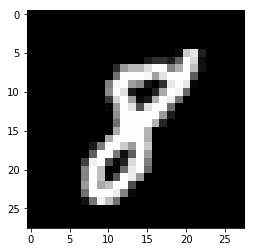

In [4]:
def view_digit(example, label=None):
    if label is not None: print("true label: {:d}".format(label+8))
    plt.imshow(example[:-1].reshape(28,28), cmap='gray');
#view_digit(data2.train_x[0],data2.train_y[0])
view_digit(data2.train_x[1],data2.train_y[1])

In this homework you'll implement a Logistic Regression classifier to take drawings of either an eight or a nine and output corresponding label.
* Finish the `sigmoid` function to return the output of applying the sigmoid function the input parameter

* Finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly

In [110]:
from collections import defaultdict
class LogReg:
    
    def __init__(self, num_features, eta):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        """
        
        self.w = np.zeros(num_features)
        self.eta = eta
        
        
    def sgd_update(self, x_i, y):
        """
        Compute a stochastic gradient update to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """
 
        # TODO: Finish this function to do a single stochastic gradient descent update
        # and return the updated weight vector

        prob = self.sigmoid((self.w.dot(x_i)))
        self.w += self.eta*x_i*(y-prob)

        return self.w
    
    def sigmoid(self, score, threshold = 20.0):
        """
        Prevent overflow of exp by capping activation at 20.
        :param score: A real valued number to convert into a number between 0 and 1
        """
        #print(score)
        if abs(score) > threshold:
            score = threshold * np.sign(score)
        
        # TODO: Finish this function to return the output of applying the sigmoid
        # function to the input score (Please do not use external libraries)
        output = 1/(1+np.exp(-score))
        return output 
    
    def progress(self, examples_x, examples_y):
        """
        Given a set of examples, computes the probability and accuracy
        :param examples: The dataset to score
        :return: A tuple of (log probability, accuracy)
        """
 
        logprob = 0.0
        num_right = 0
        for x_i, y in zip(examples_x, examples_y):
            p = self.sigmoid((self.w.dot(x_i)))
            #print(p)
            if y == 1:
                logprob += np.log(p)
            else:
                logprob += np.log(1.0 - p)
 
            # Get accuracy

            if abs(y - p) < 0.5:
                num_right += 1
 
        return logprob, float(num_right) / float(len(examples_y))

In [111]:
total = len(data2.train_x)


In [112]:
test_LR = LogReg(len(data2.train_x[0]), .01)
#adding extra dimension to training and validation sets to be used as offset
for x in range(1):
    shuff = np.arange(data2.train_x.shape[0])
    np.random.shuffle(shuff)
    data2.train_x = data2.train_x[shuff,:]
    data2.train_y = data2.train_y[shuff]
    count = 0
    for x, y in zip(data2.train_x, data2.train_y):
        #print(x,y)
        count += 1
        test_LR.sgd_update(x,y)
        if count % 1000 == 0:
            #print(test_LR.w)
            print('{:2.0%}'.format((count/total)))
            print(test_LR.progress(data2.valid_x, data2.valid_y))
    print(test_LR.progress(data2.valid_x, data2.valid_y))



10%
(-235.34881078080494, 0.9675126903553299)
20%
(-196.40006782527468, 0.9710659898477157)
31%
(-178.25978864833922, 0.9700507614213199)
41%
(-171.48626172143364, 0.9756345177664975)
51%
(-156.79784548317465, 0.9725888324873097)
61%
(-150.3468745942756, 0.9741116751269036)
71%
(-146.29407018222432, 0.9741116751269036)
81%
(-142.58200936043968, 0.9756345177664975)
92%
(-145.00896655087965, 0.9756345177664975)
(-139.31250019949144, 0.9751269035532995)


**Q:** After completing the class above, loop over the training data and perform stochastic gradient descent for three different user-defined number of epochs, and five different values of eta range [1e-3, 1]. Train your model and do the following:

* Using the `progress` method, calculate the accuracy on the training and the valid sets every 100 iterations. Plot them on same graph for every comparison.

* Using `progress` method, calculate the accuracy on the validation set and store it for every epoch.

Don't forget to shuffle your training data after each epoch.

In [175]:
# Loop over training data and perform updates
# Sample code:
# lr = LogReg(data2.train_x.shape[1], eta)
# iteration = 0
# for epoch in range(epochs):
# shuffle the data
params = []
all_results_iters_v = []
all_results_iters_t = []
all_results_epochs = []
for epochs in [1,5,10]:
    for eta in np.linspace(-3, 0, 5):
        print("Current: ", epochs, eta)
        test_LR = LogReg(data2.train_x.shape[1], 1*(10**eta))
        count = 0
        curr_results_valid = []
        curr_results_train = []
        curr_results_epochs = []
        for e in range(epochs):
            print("epoch", e)
            shuff = np.arange(data2.train_x.shape[0])
            np.random.shuffle(shuff)
            data2.train_x = data2.train_x[shuff,:]
            data2.train_y = data2.train_y[shuff]
            for x, y in zip(data2.train_x, data2.train_y):
                #print(len(data2.train_x),len(x),y)
                count += 1
                test_LR.sgd_update(x,y)
                if count % 100 == 0:
                    curr_results_train.append(test_LR.progress(data2.train_x, data2.train_y))
                    curr_results_valid.append(test_LR.progress(data2.valid_x, data2.valid_y))
            curr_results_epochs.append(test_LR.progress(data2.valid_x, data2.valid_y))
        all_results_iters_t.append(curr_results_train)
        all_results_iters_v.append(curr_results_valid)
        all_results_epochs.append(curr_results_epochs)
        params.append((epochs, eta))
        print("final:", test_LR.progress(data2.valid_x, data2.valid_y))

Current:  1 -3.0
epoch 0
final: (-240.3114106223939, 0.966497461928934)
Current:  1 -2.25
epoch 0
final: (-152.85572766270354, 0.9736040609137055)
Current:  1 -1.5
epoch 0
final: (-128.53041696370948, 0.9791878172588833)
Current:  1 -0.75
epoch 0
final: (-304.15373379076556, 0.9761421319796955)
Current:  1 0.0
epoch 0
final: (-684.1903421484541, 0.9781725888324873)
Current:  5 -3.0
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
final: (-156.47733857812938, 0.9756345177664975)
Current:  5 -2.25
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
final: (-118.22825418857687, 0.9781725888324873)
Current:  5 -1.5
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
final: (-109.93214726839777, 0.9807106598984772)
Current:  5 -0.75
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
final: (-312.9551271010727, 0.9771573604060914)
Current:  5 0.0
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
final: (-684.977060533937, 0.9786802030456853)
Current:  10 -3.0
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
final:

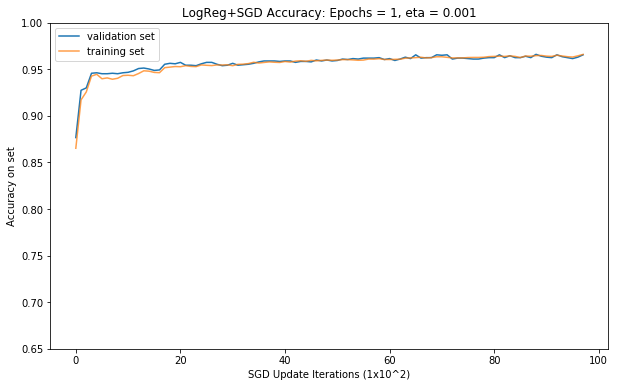

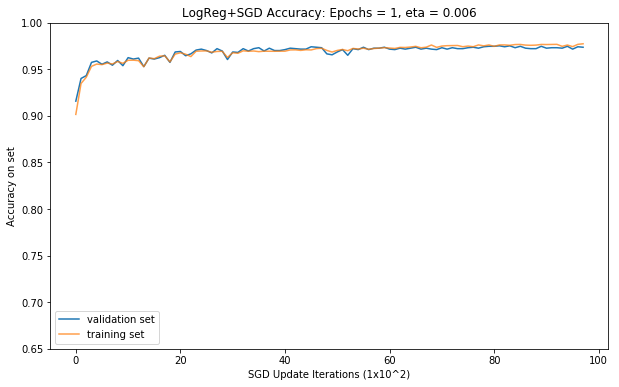

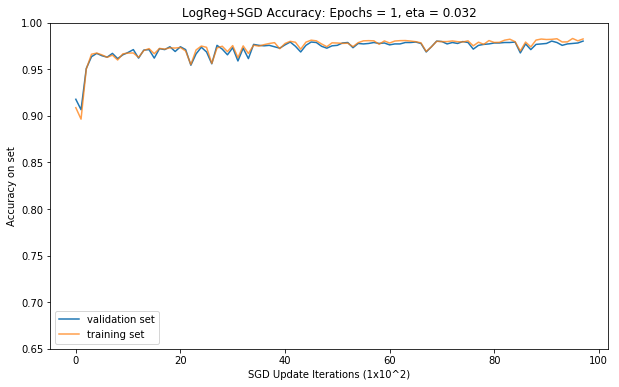

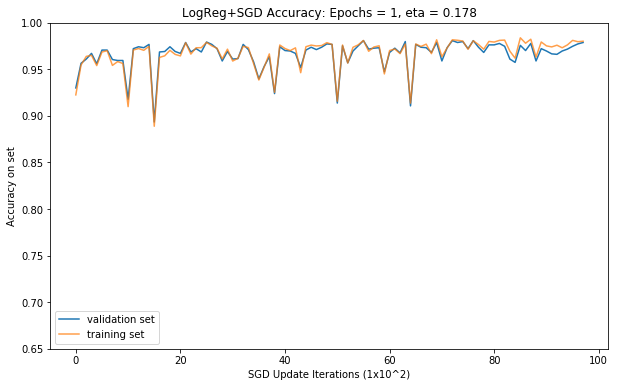

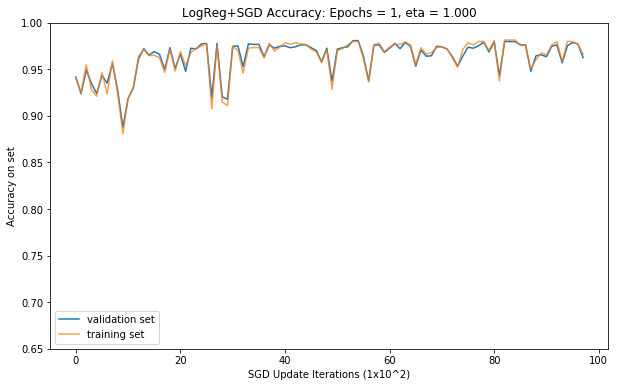

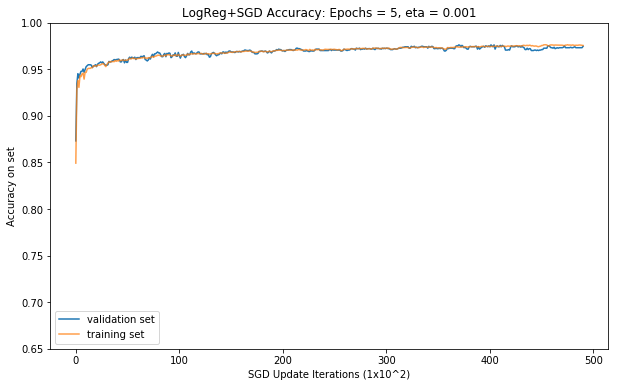

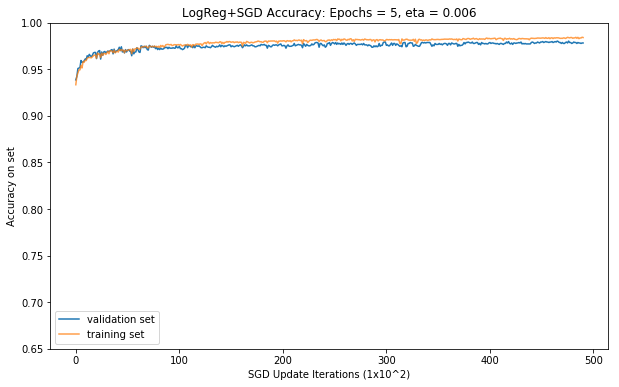

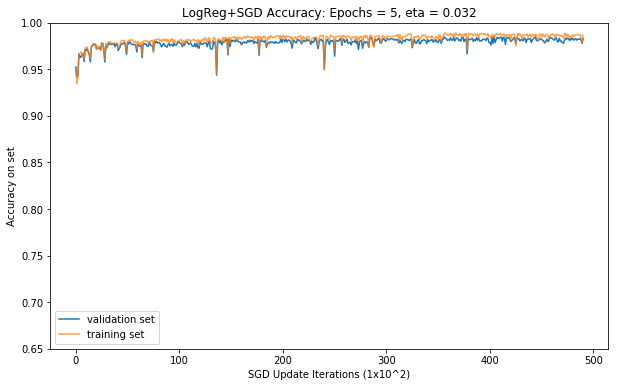

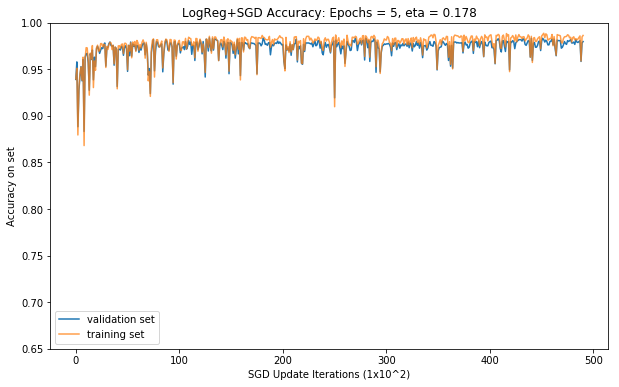

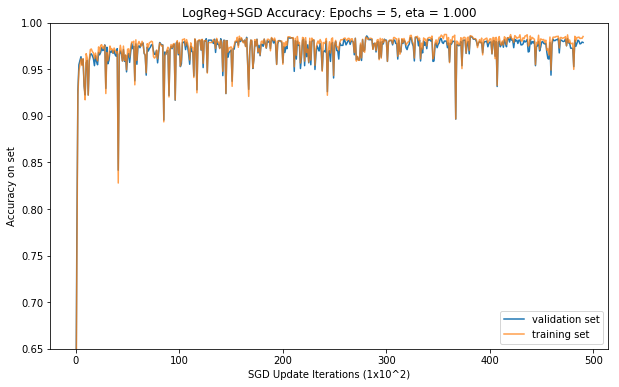

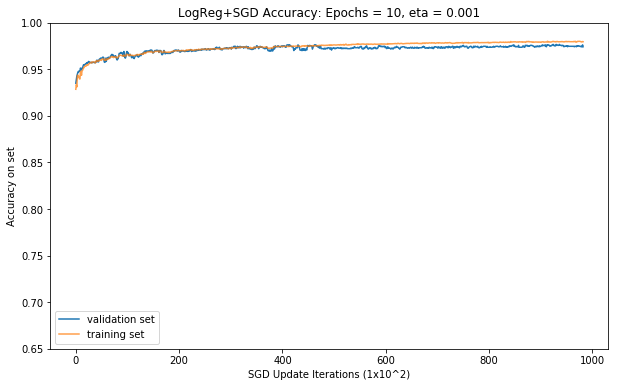

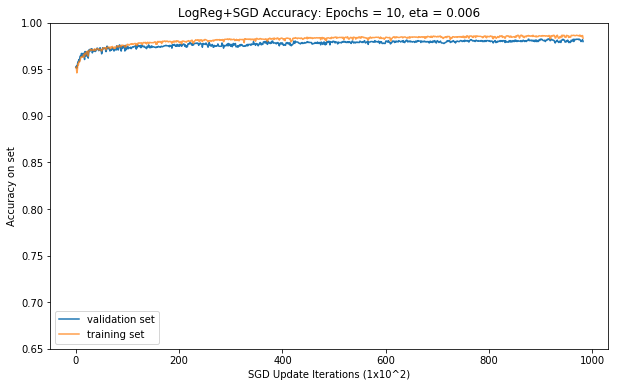

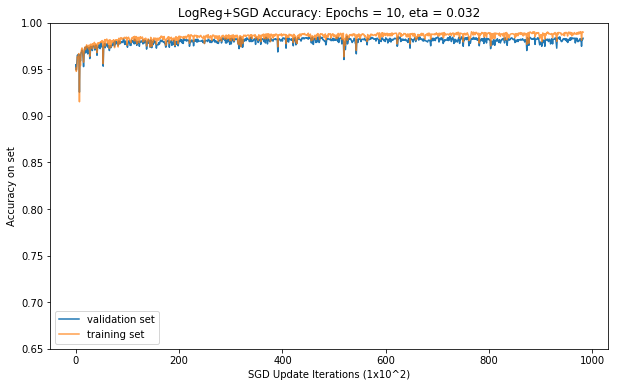

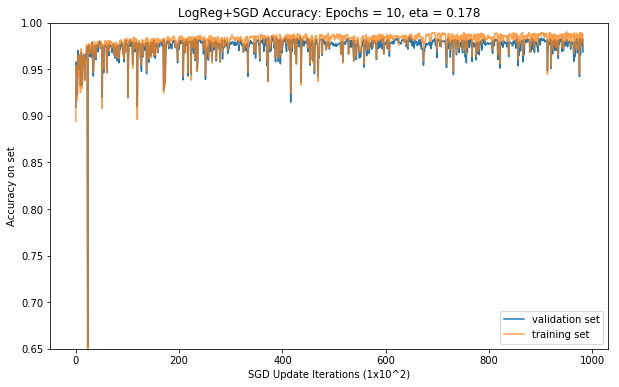

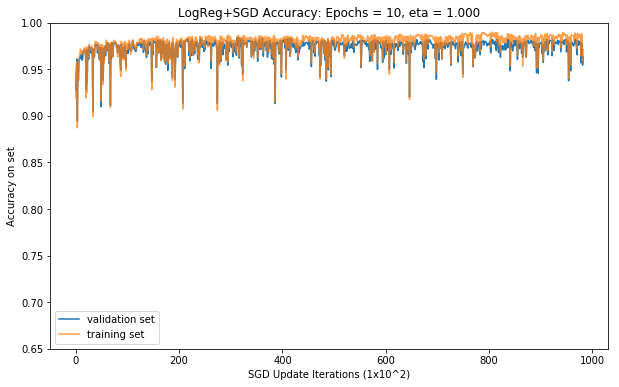

In [188]:

for t,v,p in zip(all_results_iters_t,all_results_iters_v, params):
    fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
    plt.plot(range(len(v)), [x[1] for x in v], label = "validation set")
    plt.plot(range(len(t)), [x[1] for x in t], label = "training set", alpha = 0.75)
    eta = 1*10**p[1]
    plt.title("LogReg+SGD Accuracy: Epochs = %i, eta = %.3f"%(p[0], eta), fontsize=12)
    plt.xlabel("SGD Update Iterations (1x10^2)")
    plt.ylabel("Accuracy on set")
    plt.ylim(0.65, 1)
    plt.legend()
    plt.show()




**Q:** Describe the role of learning rate (eta) on the efficiency of convergence during training?

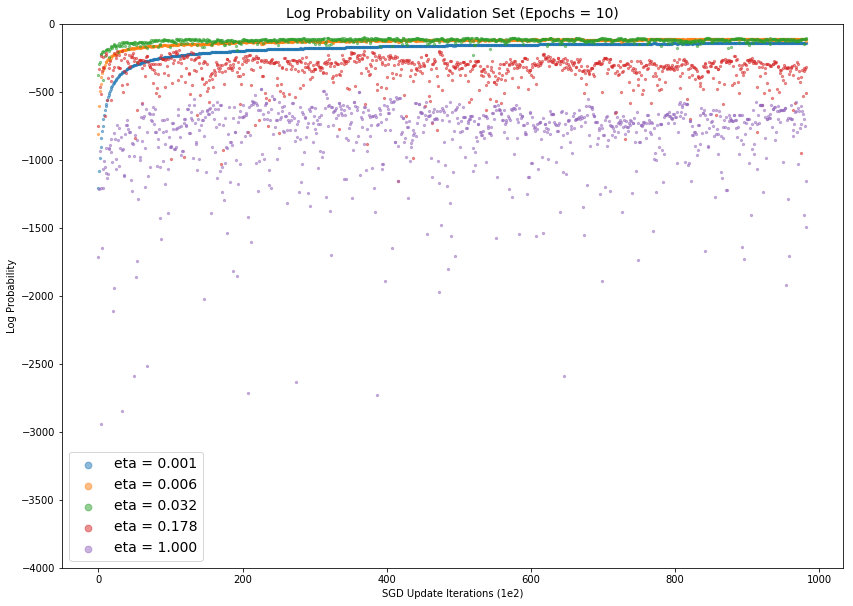

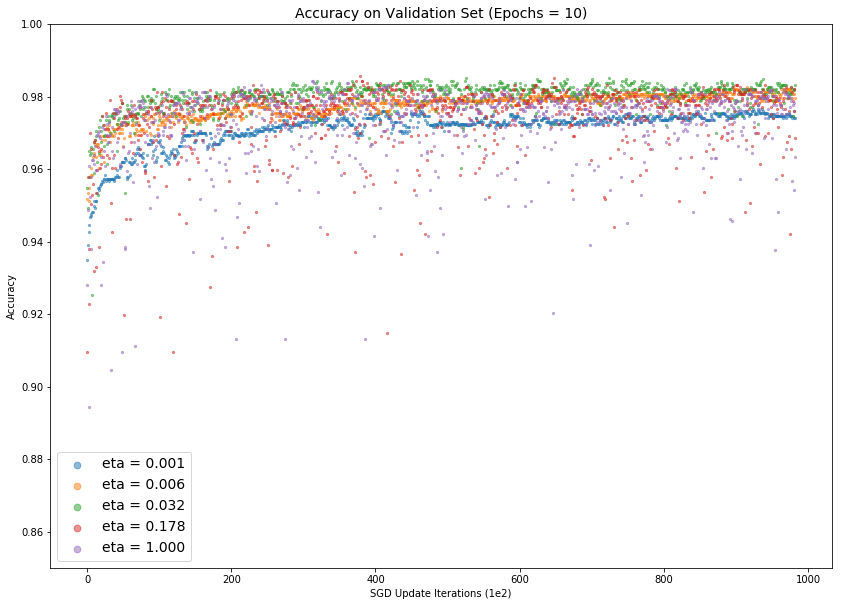

In [277]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(14,10))
average_loss_lastIters = []
average_acc_lastIters = []
for i in range(10,15):
    avg_loss = (np.average([x[0] for x in all_results_iters_v[i][-100:]]), np.std([x[0] for x in all_results_iters_v[i][-100:]]))
    average_loss_lastIters.append(avg_loss)                   
    plt.scatter(range(len(all_results_iters_v[i])), [x[0] for x in all_results_iters_v[i]], label = "eta = %.3f"%(1*10**params[i][1]), s = 5,alpha = 0.5)
plt.legend(markerscale = 3, fontsize = 14)
plt.title("Log Probability on Validation Set (Epochs = 10)", fontsize = 14)
plt.xlabel("SGD Update Iterations (1e2)")
plt.ylabel("Log Probability")
plt.ylim(-4000, 0)
plt.show()

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(14,10))
for i in range(10,15):
    avg_loss = (np.average([x[1] for x in all_results_iters_v[i][-100:]]), np.std([x[1] for x in all_results_iters_v[i][-100:]]))
    average_acc_lastIters.append(avg_loss)   
    plt.scatter(range(len(all_results_iters_v[i])), [x[1] for x in all_results_iters_v[i]], label = "eta = %.3f"%(1*10**params[i][1]), s = 5,alpha = 0.5)
plt.legend(markerscale = 3, fontsize = 14)
plt.title("Accuracy on Validation Set (Epochs = 10)", fontsize = 14)
plt.xlabel("SGD Update Iterations (1e2)")
plt.ylabel("Accuracy")
plt.ylim(0.85, 1)
plt.show()

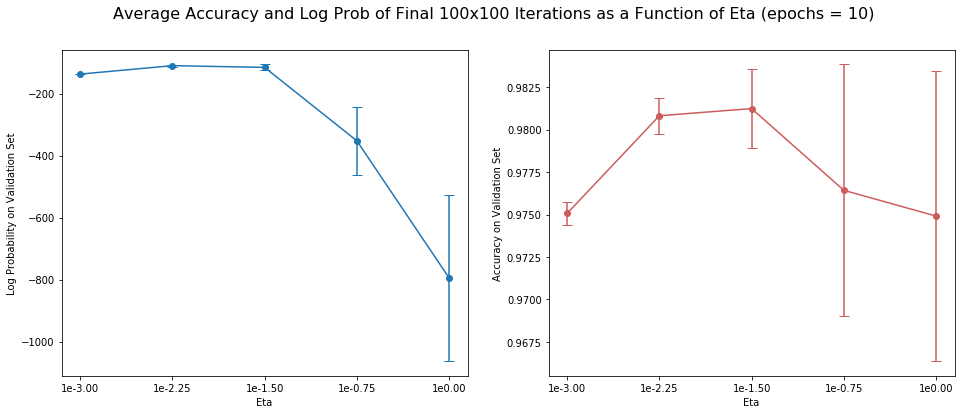

In [276]:
etas = [params[i][1] for i in range(10,15)]
x_labels = ["1e%.2f"%e for e in etas]
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16,6))
fig.suptitle("Average Accuracy and Log Prob of Final 100x100 Iterations as a Function of Eta (epochs = 10)", size = 16)
plt.subplot(1,2,1)
plt.errorbar(etas, [x[0] for x in average_loss_lastIters], yerr = [x[1] for x in average_loss_lastIters], capsize = 5,marker = 'o')
plt.xticks(etas, x_labels)
plt.xlabel("Eta")
plt.ylabel("Log Probability on Validation Set")
plt.subplot(1,2,2)
plt.errorbar(etas, [x[0] for x in average_acc_lastIters], yerr = [x[1] for x in average_acc_lastIters],capsize = 5,color = 'indianred' ,marker = 'o')
plt.xticks(etas, x_labels)
plt.xlabel("Eta")
plt.ylabel("Accuracy on Validation Set")
plt.show()


For the largest learning rates, the log probability (or the accuracy) varies the most at the start but then almost immediately converges, although it doesn't truly converge since there is so much variability even at the end of the 10th epoch. The average accuracy/log probability does plateau, however, for the larger etas (1 and 0.178), but the average accuracy is lower than that for the lower etas. This poorer performance and variability at higher etas implies that the model isn't really converging, but more bouncing around the actual minimum loss model, w.

For the smaller learning rates, looking at the first plot above (log prob vs. iterations), we can see that they take longer to converge the smaller the learning rate. The smallest learning rate is still slowly improving at 600x100 iterations. As the learning rate increases, so does the speed (number of iterations needed) of convergence but it also introduces greater variability as can be seen in the final two plots. 

For this application, the learning rates of 1e-2.25 or 1e-1.50 seem to be best at learning the model at a reasonable speed and for actually converging on a nearly optimal model (accuracy of about 98%).

**Q:** Describe the role of the number of epochs on validation accuracy?

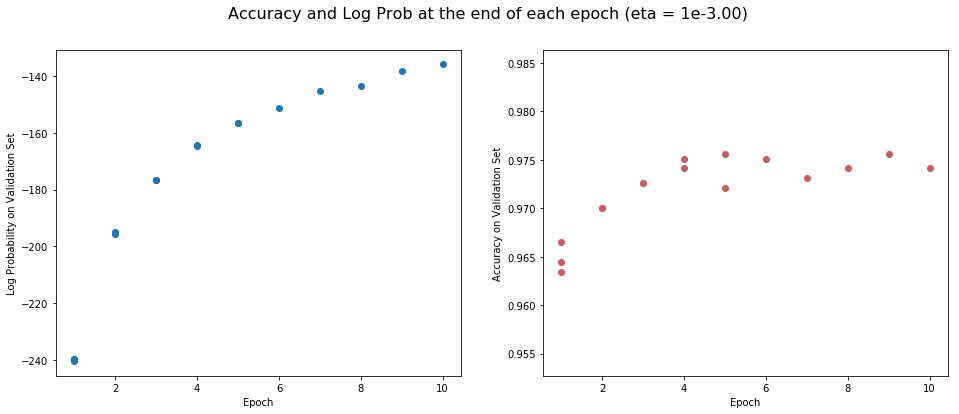

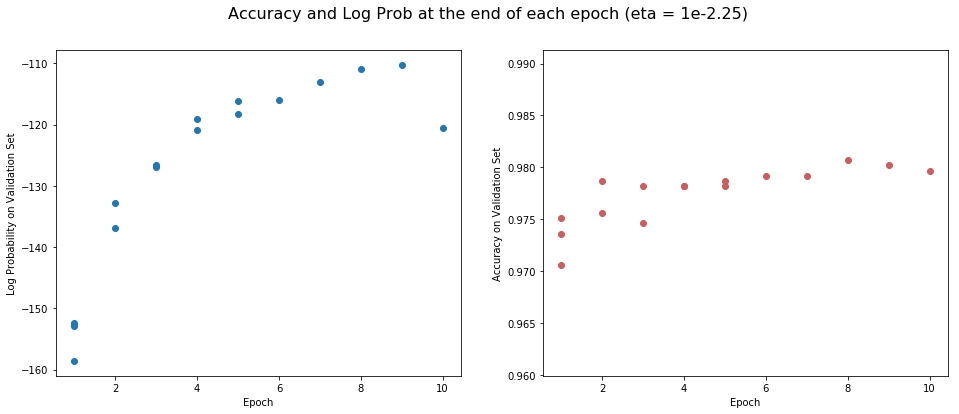

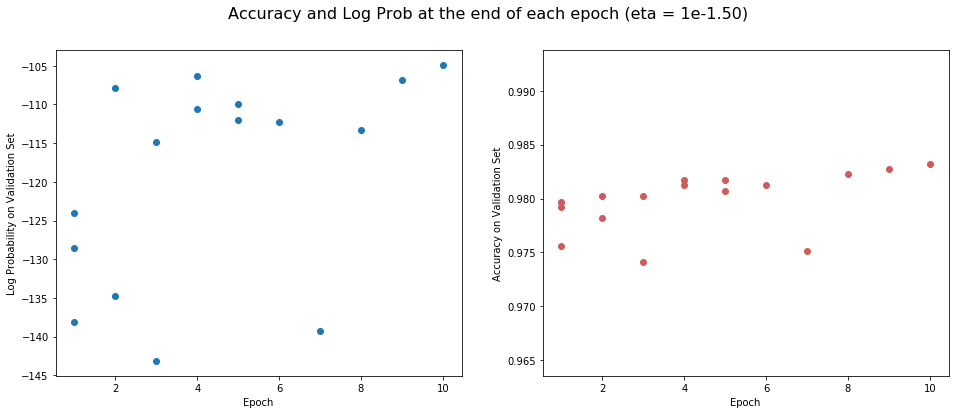

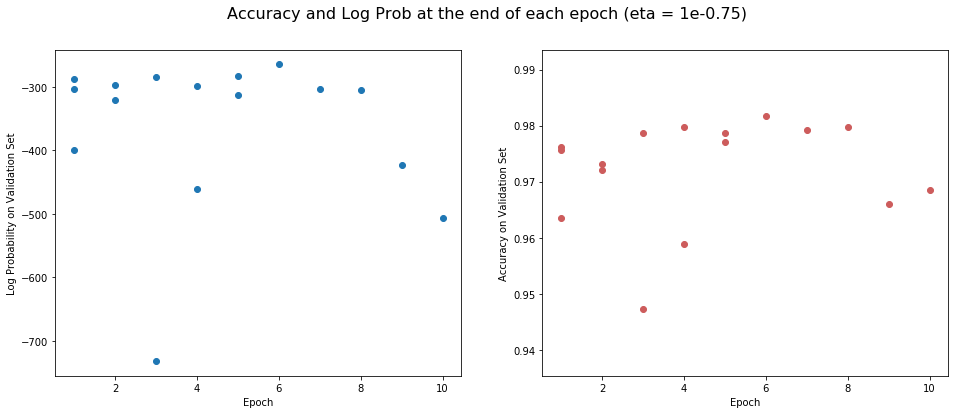

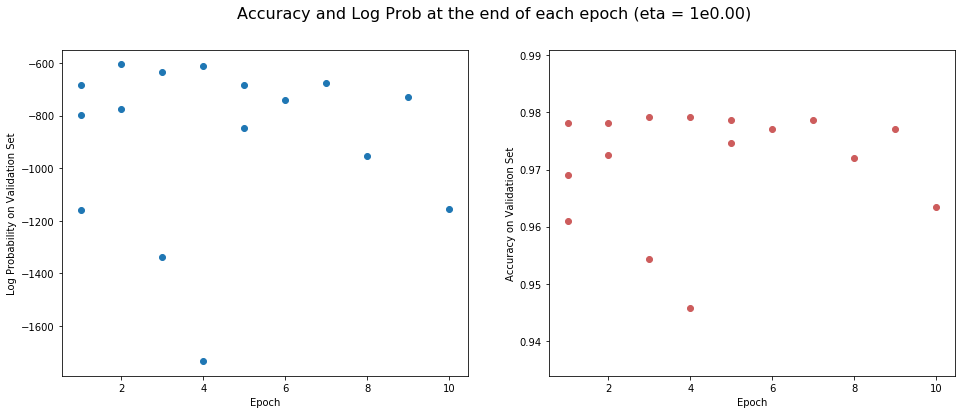

In [310]:

for e in etas:
    epochs_accs = []
    epochs_lp = []
    num_epoch = []
    for i,x in enumerate(all_results_epochs):
        if etas[i%len(etas)] == e:
            for epoch,acc in enumerate(x):
                num_epoch.append(epoch+1)
                epochs_accs.append(acc[1])
                epochs_lp.append(acc[0])
    fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16,6))
    fig.suptitle("Accuracy and Log Prob at the end of each epoch (eta = 1e%.2f)"%e, size = 16)
    plt.subplot(1,2,1)
    plt.scatter(num_epoch,epochs_lp ,marker = 'o')
    plt.xlabel("Epoch")
    plt.ylabel("Log Probability on Validation Set")
    plt.subplot(1,2,2)
    plt.scatter(num_epoch,epochs_accs ,color = 'indianred' ,marker = 'o')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy on Validation Set")
    plt.show()

For smaller etas, as the epochs increases so does the accuracy, which makes sense since these are slower learners by design. This trend is most noticeable in the log probability plots, but can also be seen in the accuracy plots. 

As the eta is increased, the role of the epochs is diminished since most of the accuracy gain occurs in the first epoch. The model does not continue to improve even as more epochs are passed over. 

To truly converge on a model as close to optimal as possible, it might be best to use eta = 1e-3 and increase the number of epochs above 10 since the log probability plot is still increasing at the end of the tenth epoch. 